In [48]:
from IPython.display import Audio
import librosa
from librosa import display
import numpy as np
import scipy
from matplotlib import pyplot as plt
import os
import pandas as pd
from tqdm import tqdm
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
plt.style.use('ggplot')
%matplotlib inline

In [49]:
WAV_DIR = 'wav_files/'
wav_files = os.listdir(WAV_DIR)[:]   # originally only 10 files were used

In [50]:
col_names = ['file_name', # 'signal_mean', 'signal_std', 'signal_skew', 'signal_kurtosis', 
             'zcr_mean', 'zcr_std', #'rmse_mean', 'rmse_std', 'tempo',
             'spectral_centroid_mean', 'spectral_centroid_std',
             'spectral_bandwidth_2_mean', 'spectral_bandwidth_2_std',
             'spectral_bandwidth_3_mean', 'spectral_bandwidth_3_std',
             'spectral_bandwidth_4_mean', 'spectral_bandwidth_4_std'] + \
            ['spectral_contrast_' + str(i+1) + '_mean' for i in range(7)] + \
            ['spectral_contrast_' + str(i+1) + '_std' for i in range(7)] + \
            ['spectral_rolloff_mean', 'spectral_rolloff_std'] + \
            ['mfccs_' + str(i+1) + '_mean' for i in range(7)] + \
            ['mfccs_' + str(i+1) + '_std' for i in range(7)] # + \
            #['chroma_stft_' + str(i+1) + '_mean' for i in range(12)] + \
            #['chroma_stft_' + str(i+1) + '_std' for i in range(12)] 
            

In [51]:
df = pd.DataFrame(columns=col_names)
for f in tqdm(wav_files[:]):    # originally only 10 files were used
    #try:
    # Read wav-file
    y, sr = librosa.load(WAV_DIR+f, sr = 22050)

    feature_list = [f]

    #feature_list.append(np.mean(abs(y)))
    #feature_list.append(np.std(y))
    #feature_list.append(scipy.stats.skew(abs(y)))
    #feature_list.append(scipy.stats.kurtosis(y))

    zcr = librosa.feature.zero_crossing_rate(y + 0.0001, frame_length=2048, hop_length=512)[0]
    feature_list.append(np.mean(zcr))
    feature_list.append(np.std(zcr))

    #rmse = librosa.feature.rmse(y + 0.0001)[0]
    #feature_list.append(np.mean(rmse))
    #feature_list.append(np.std(rmse))

    #tempo = librosa.beat.tempo(y, sr=sr)
    #feature_list.extend(tempo)

    spectral_centroids = librosa.feature.spectral_centroid(y+0.01, sr=sr)[0]
    feature_list.append(np.mean(spectral_centroids))
    feature_list.append(np.std(spectral_centroids))

    spectral_bandwidth_2 = librosa.feature.spectral_bandwidth(y+0.01, sr=sr, p=2)[0]
    spectral_bandwidth_3 = librosa.feature.spectral_bandwidth(y+0.01, sr=sr, p=3)[0]
    spectral_bandwidth_4 = librosa.feature.spectral_bandwidth(y+0.01, sr=sr, p=4)[0]
    feature_list.append(np.mean(spectral_bandwidth_2))
    feature_list.append(np.std(spectral_bandwidth_2))
    feature_list.append(np.mean(spectral_bandwidth_3))
    feature_list.append(np.std(spectral_bandwidth_3))
    feature_list.append(np.mean(spectral_bandwidth_3))
    feature_list.append(np.std(spectral_bandwidth_3))

    spectral_contrast = librosa.feature.spectral_contrast(y, sr=sr, n_bands = 6, fmin = 200.0)
    feature_list.extend(np.mean(spectral_contrast, axis=1))
    feature_list.extend(np.std(spectral_contrast, axis=1))

    spectral_rolloff = librosa.feature.spectral_rolloff(y+0.01, sr=sr, roll_percent = 0.85)[0]
    feature_list.append(np.mean(spectral_rolloff))
    feature_list.append(np.std(spectral_rolloff))

    mfccs = librosa.feature.mfcc(y, sr=sr, n_mfcc=7)
    feature_list.extend(np.mean(mfccs, axis=1))
    feature_list.extend(np.std(mfccs, axis=1))

    #chroma_stft = librosa.feature.chroma_stft(y, sr=sr, hop_length=1024)
    #feature_list.extend(np.mean(chroma_stft, axis=1))
    #feature_list.extend(np.std(chroma_stft, axis=1))

    feature_list[1:] = np.round(feature_list[1:], decimals=3)

    df = df.append(pd.DataFrame(feature_list, index=col_names).transpose(), ignore_index=True)
    #except:
    #    pass
    
df_archive = df


100%|██████████| 5125/5125 [46:03<00:00,  1.85it/s]


In [52]:
print (df.shape)

df.head()

(5125, 41)


,file_name,zcr_mean,zcr_std,spectral_centroid_mean,spectral_centroid_std,spectral_bandwidth_2_mean,spectral_bandwidth_2_std,spectral_bandwidth_3_mean,spectral_bandwidth_3_std,spectral_bandwidth_4_mean,...,mfccs_5_mean,mfccs_6_mean,mfccs_7_mean,mfccs_1_std,mfccs_2_std,mfccs_3_std,mfccs_4_std,mfccs_5_std,mfccs_6_std,mfccs_7_std
0,22564_Wedding_music.wav,0.07,0.052,1592.89,837.747,2045.65,537.049,2708.92,468.247,2708.92,...,13.399,16.339,-3.228,55.087,34.763,21.004,16.305,17.201,11.593,10.033
1,2170_Wedding_music.wav,0.063,0.013,1221.53,261.625,1518.88,309.207,2166.35,311.463,2166.35,...,-19.441,2.701,-20.735,39.937,21.021,10.863,12.045,11.556,9.241,8.503
2,12235_Dance_music.wav,0.055,0.039,2488.92,850.331,2774.21,355.493,3285.02,259.509,3285.02,...,10.107,22.049,18.266,56.005,30.493,17.4,14.194,10.092,11.339,9.361
3,4743_Dance_music.wav,0.128,0.051,2502.57,613.75,2544.9,343.957,3040.35,236.255,3040.35,...,-9.384,14.688,-0.655,37.888,16.564,15.945,12.229,9.082,9.681,12.593
4,17151_Wedding_music.wav,0.083,0.016,1494.65,138.046,1436.22,139.801,1965.98,178.588,1965.98,...,-49.628,-29.26,-33.993,26.13,10.938,10.662,7.632,7.892,6.731,5.457


## Remove vague classes

In [53]:
df = df_archive
print (df.shape)
label_dict = {  'Background_music':0,
    'Theme_music':1,
    'Jingle':2,
    'Soundtrack_music':3,
    'Lullaby':4,
    'Video_game_music':5,
    'Christmas_music':6,
    'Dance_music':7,
    'Wedding_music':8}
    # 'Birthday_music':9} 
    
to_remove = [0, 1, 3]
df['label'] = df['file_name'].apply(lambda x: label_dict[x[:-4].split('_', 1)[1]])
count = 0
for l in to_remove:
    df = df[df['label'] != l]


df = df.reset_index(drop=True)   # set index back to sequential

#del(df['label'])
print (df.shape)
    
df.head()

(5125, 41)
(3418, 42)


,file_name,zcr_mean,zcr_std,spectral_centroid_mean,spectral_centroid_std,spectral_bandwidth_2_mean,spectral_bandwidth_2_std,spectral_bandwidth_3_mean,spectral_bandwidth_3_std,spectral_bandwidth_4_mean,...,mfccs_6_mean,mfccs_7_mean,mfccs_1_std,mfccs_2_std,mfccs_3_std,mfccs_4_std,mfccs_5_std,mfccs_6_std,mfccs_7_std,label
0,22564_Wedding_music.wav,0.07,0.052,1592.89,837.747,2045.65,537.049,2708.92,468.247,2708.92,...,16.339,-3.228,55.087,34.763,21.004,16.305,17.201,11.593,10.033,8
1,2170_Wedding_music.wav,0.063,0.013,1221.53,261.625,1518.88,309.207,2166.35,311.463,2166.35,...,2.701,-20.735,39.937,21.021,10.863,12.045,11.556,9.241,8.503,8
2,12235_Dance_music.wav,0.055,0.039,2488.92,850.331,2774.21,355.493,3285.02,259.509,3285.02,...,22.049,18.266,56.005,30.493,17.4,14.194,10.092,11.339,9.361,7
3,4743_Dance_music.wav,0.128,0.051,2502.57,613.75,2544.9,343.957,3040.35,236.255,3040.35,...,14.688,-0.655,37.888,16.564,15.945,12.229,9.082,9.681,12.593,7
4,17151_Wedding_music.wav,0.083,0.016,1494.65,138.046,1436.22,139.801,1965.98,178.588,1965.98,...,-29.26,-33.993,26.13,10.938,10.662,7.632,7.892,6.731,5.457,8


In [54]:
df.to_csv('extracted_features/df_features_cutted_classes.csv', index=False)

## Vizualizing features (T-SNE)

Visualizing obtained features using T-SNE. Because the full feature space has high dimentionality (97), PCA is performed first. 

In [55]:
%%time

n_comp = 60

#pca = PCA(n_components=n_comp)
#pca_result = pca.fit_transform(df[df.columns[1:-1]].values)

#print ('Cumulative explained variation for ' + str(n_comp) + ' principal components: ' 
       #+ str(round(np.sum(pca.explained_variance_ratio_), 4)*100) + '%')

tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(df[df.columns[1:-1]].values)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 3418 samples in 0.003s...
[t-SNE] Computed neighbors for 3418 samples in 0.195s...
[t-SNE] Computed conditional probabilities for sample 1000 / 3418
[t-SNE] Computed conditional probabilities for sample 2000 / 3418
[t-SNE] Computed conditional probabilities for sample 3000 / 3418
[t-SNE] Computed conditional probabilities for sample 3418 / 3418
[t-SNE] Mean sigma: 112.685104
[t-SNE] KL divergence after 250 iterations with early exaggeration: 67.114105
[t-SNE] Error after 300 iterations: 1.449142
CPU times: user 18.2 s, sys: 965 ms, total: 19.2 s
Wall time: 19.1 s


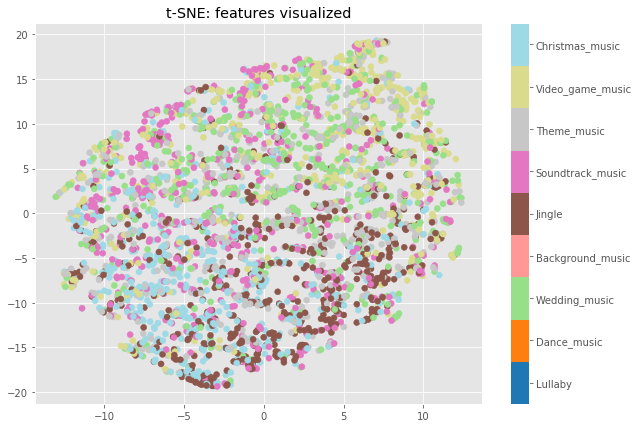

In [56]:
df_tsne = df.copy()
df_tsne['x-tsne'] = tsne_results[:,0]
df_tsne['y-tsne'] = tsne_results[:,1]

plt.figure(figsize=(10,7))
plt.title('t-SNE: features visualized')  # using ' + str(n_comp) + ' PCA components'
plot = plt.scatter(df_tsne['x-tsne'], df_tsne['y-tsne'], c=df_tsne['label'], cmap=plt.cm.get_cmap("Vega20", 9))
cbar = plt.colorbar(ticks=range(9))
cbar.set_ticklabels(list(label_dict.keys()))

plt.clim(-0.5, 8.5)

plt.show()

Final feature formulation and saving to file:

In [ ]:
# features
col_names = ['pca_' + str(i+1) for i in range(n_comp)] # ['file_name'] + \
            
#df_pca = pd.DataFrame(columns=col_names)
# print (pca_result)

df_pca = pd.DataFrame(data=pca_result)
df_pca.columns = col_names
df_pca.insert(0, 'file_name', df['file_name'])

# Save file
df_pca.to_csv('extracted_features/df_features_pca.csv', index=False)

df_pca.head()